In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
img = cv2.imread('./img2/im01.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img_result=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img_result)

True

In [3]:
!python --version

Python 3.7.1


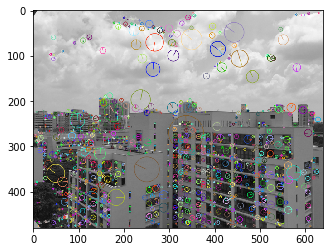

In [4]:
plt.imshow(img_result)

In [5]:
len(kp)

1603

<BarContainer object of 128 artists>

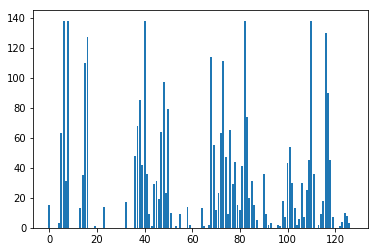

In [6]:
plt.bar(np.arange(len(des[23])),des[23])

<BarContainer object of 128 artists>

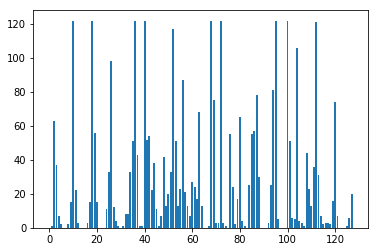

In [7]:
plt.bar(np.arange(len(des[43])),des[43])

# Part 2

In [98]:
img1 = cv2.imread('./img2/im01.jpg')
img2 = cv2.imread('./img2/im02.jpg')

In [99]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
sift = cv2.xfeatures2d.SIFT_create()

kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2=sift.detectAndCompute(img2,None)

#kp1, des1 = orb.detectAndCompute(img1,None)
#kp2, des2 = orb.detectAndCompute(img2,None)

In [102]:
matches_sorted[50].distance

58.12056350708008

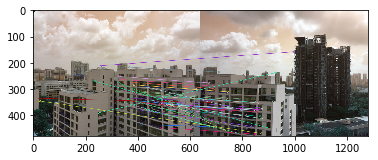

In [103]:
# create BFMatcher object
#bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
bf = cv2.BFMatcher(crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches_sorted = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches_sorted[50:100],None,flags=2)
plt.imshow(img3)
plt.show()

In [104]:
matches_sorted[0].queryIdx

1187

In [105]:
matches_sorted[0].distance

32.924156188964844

In [106]:
matches_sorted[0].queryIdx

1187

In [107]:
src=[]
dest=[]
for match in matches_sorted[:100]:
    kp_img1=kp1[match.queryIdx]
    kp_img2=kp2[match.trainIdx]
    src.append((kp_img1.pt[0],kp_img1.pt[1]))
    dest.append((kp_img2.pt[0],kp_img2.pt[1]))         

In [108]:
h, status = cv2.findHomography(np.array(src), np.array(dest),cv2.RANSAC, 5.0)

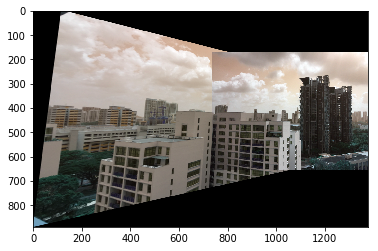

In [109]:
rows1, cols1 = img1.shape[:2]
rows2, cols2 = img2.shape[:2]

list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1, rows1], [cols1,0]]).reshape(-1,1,2)
temp_points = np.float32([[0,0], [0,rows2], [cols2, rows2], [cols2,0]]).reshape(-1,1,2)

list_of_points_2 = cv2.perspectiveTransform(temp_points, h)
list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

[x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

translation_dist = [-x_min, -y_min]
H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

im_out = cv2.warpPerspective(img1,H_translation.dot(h),(x_max - x_min, y_max - y_min))
im_out[translation_dist[1]:rows1+translation_dist[1],translation_dist[0]:cols1+translation_dist[0]] = img2
plt.imshow(im_out)

In [63]:
kp1[172].pt

(571.2000122070312, 136.8000030517578)

In [54]:
matches_sorted[0].trainIdx

112

In [11]:
cv2.imwrite('100Matches.jpg',img3)

True

In [120]:
img3.shape[1]

640

#### Wrong Match

In [12]:
img2 = cv2.imread('./img2/im02.jpg')
img3 = cv2.imread('./img2/im03.jpg')

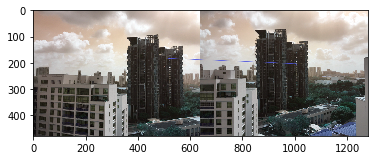

In [13]:
img4 = cv2.drawMatches(img2,kp1,img3,kp2,matches_sorted[297:298],None,flags=2)
plt.imshow(img4)
plt.show()

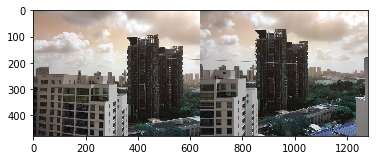

In [28]:
img4 = cv2.drawMatches(img2,kp1,img3,kp2,matches[77:78],None,flags=2)
plt.imshow(img4)
plt.show()

In [29]:
cv2.imwrite('Error_Match.jpg',img4)

True

In [107]:
Index1=matches[77].queryIdx

<BarContainer object of 32 artists>

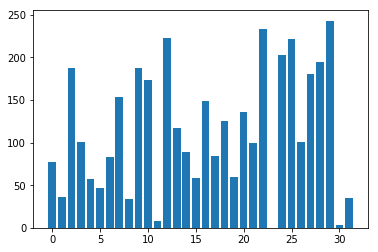

In [110]:
plt.bar(np.arange(len(des1[Index1])),des1[Index1])

In [108]:
Index2=matches[77].trainIdx

<BarContainer object of 32 artists>

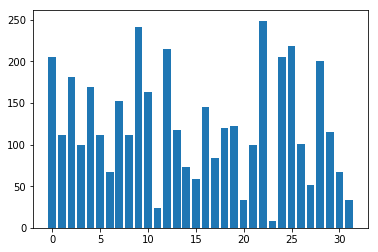

In [109]:
plt.bar(np.arange(len(des2[Index2])),des2[Index2])

## Good Match

In [57]:
img2 = cv2.imread('./img2/im02.jpg')
img3 = cv2.imread('./img2/im03.jpg')

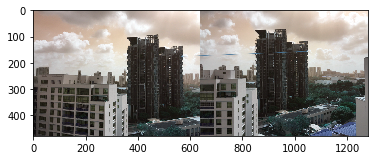

In [62]:
img5 = cv2.drawMatches(img2,kp1,img3,kp2,matches_sorted[250:251],None,flags=2)
plt.imshow(img5)
plt.show()

In [63]:
cv2.imwrite('Good_match.jpg',img5)

True

In [115]:
Index1_goodMatch=matches[250].queryIdx
Index2_goodMatch=matches[250].trainIdx

<BarContainer object of 32 artists>

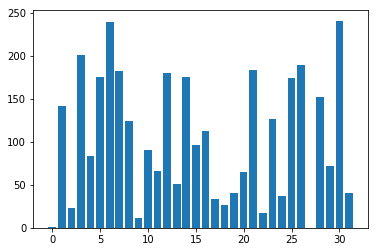

In [116]:
plt.bar(np.arange(len(des1[Index1_goodMatch])),des1[Index1_goodMatch])

<BarContainer object of 32 artists>

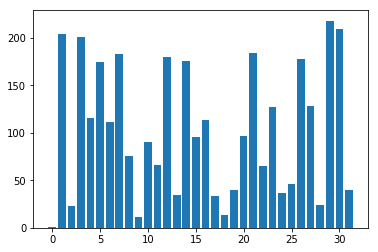

In [117]:
plt.bar(np.arange(len(des2[Index2_goodMatch])),des2[Index2_goodMatch])